In [1]:
# import funcs
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

In [2]:
import funcs

In [3]:
df = pd.read_csv("diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
funcs.InfoColumns(df)

,column_name,dtype,Null_Values
0,Pregnancies,int64,0
1,Glucose,int64,0
2,BloodPressure,int64,0
3,SkinThickness,int64,0
4,Insulin,int64,0
5,BMI,float64,0
6,DiabetesPedigreeFunction,float64,0
7,Age,int64,0
8,Outcome,int64,0


In [5]:
print(df.describe(include='all'))

       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  

In [6]:
n = np.shape(df)[0]
p = np.shape(df)[1]

print("The shape of the dataset: {}\n\t*Number of Samples: {}\n\t*Number of features: {}"
     .format(np.shape(df), n, p))

The shape of the dataset: (768, 9)
	*Number of Samples: 768
	*Number of features: 9


In [7]:
# Check the skewness and kurtosis of the dataset.

In [8]:
print(df.drop(['Outcome'], axis=1).skew(axis=0))

Pregnancies                 0.901674
Glucose                     0.173754
BloodPressure              -1.843608
SkinThickness               0.109372
Insulin                     2.272251
BMI                        -0.428982
DiabetesPedigreeFunction    1.919911
Age                         1.129597
dtype: float64


In [9]:
print(df.drop(['Outcome'], axis=1).kurtosis(axis=0))

Pregnancies                 0.159220
Glucose                     0.640780
BloodPressure               5.180157
SkinThickness              -0.520072
Insulin                     7.214260
BMI                         3.290443
DiabetesPedigreeFunction    5.594954
Age                         0.643159
dtype: float64


<AxesSubplot:>

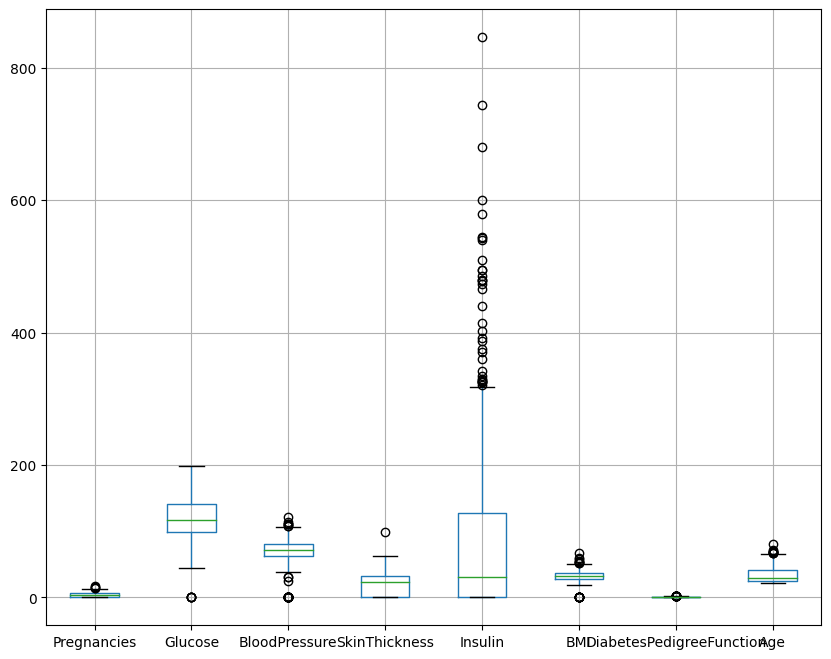

In [10]:
plt.figure(figsize=(10,8))
df.drop(['Outcome'], axis=1).boxplot(figsize=(10,8))

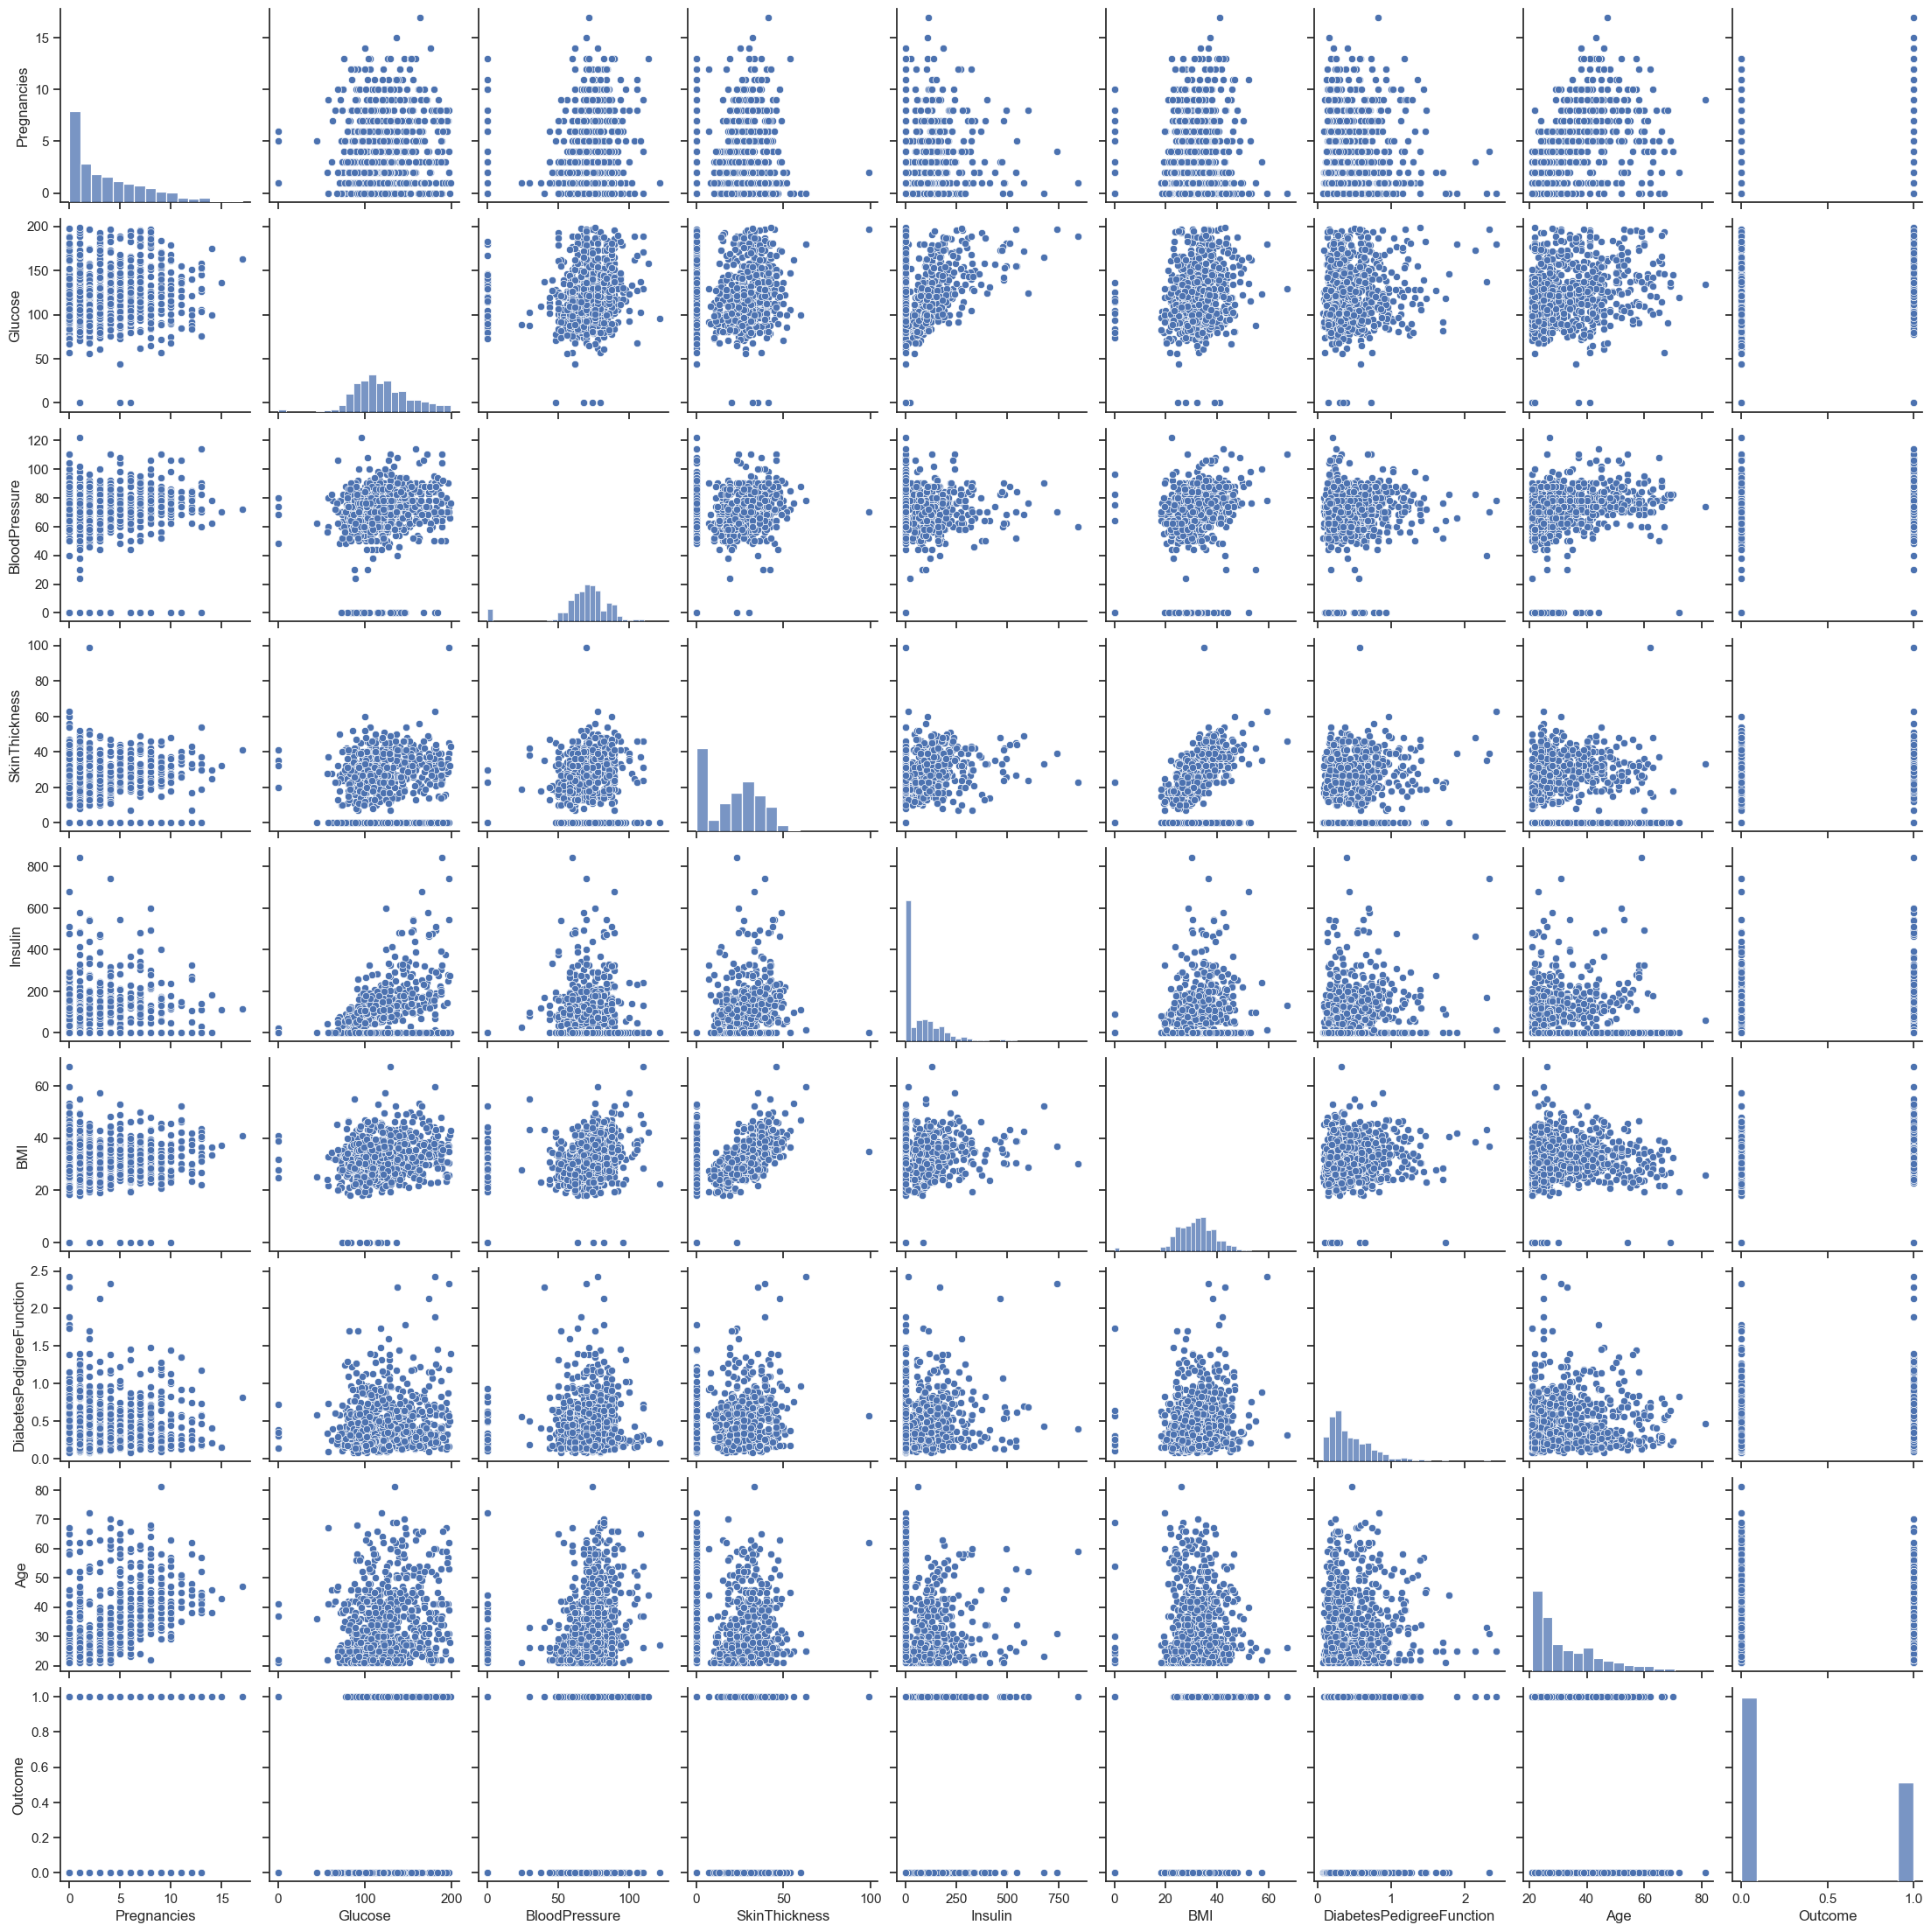

In [11]:
sns.set(style='ticks',color_codes='True')
sns.pairplot(data=df, markers='o')

In [12]:
X = df.drop(['Outcome'], axis=1).values  # Drop the target column

In [13]:
Xc = X - np.mean(X, axis=0)

In [14]:
Xc  # Now we get the centered dataset

array([[  2.15494792,  27.10546875,   2.89453125, ...,   1.60742188,
          0.1551237 ,  16.75911458],
       [ -2.84505208, -35.89453125,  -3.10546875, ...,  -5.39257812,
         -0.1208763 ,  -2.24088542],
       [  4.15494792,  62.10546875,  -5.10546875, ...,  -8.69257812,
          0.2001237 ,  -1.24088542],
       ...,
       [  1.15494792,   0.10546875,   2.89453125, ...,  -5.79257812,
         -0.2268763 ,  -3.24088542],
       [ -2.84505208,   5.10546875,  -9.10546875, ...,  -1.89257812,
         -0.1228763 ,  13.75911458],
       [ -2.84505208, -27.89453125,   0.89453125, ...,  -1.59257812,
         -0.1568763 , -10.24088542]])

In [15]:
# Find the Covariance and Correlation Matrix of the matrix Xc.T which is transpose of the centered dataset because goal
# of the analysis is to find some relations between the features and not samples.

# Computing the covariance on the centered dataset is equivalent of finding covariance on the original dataset.

In [16]:
Cov_Xc = np.cov(Xc.T)
print("This is the Covariance Matrix C of the Transposed Centered Dataset: \n\n{}".format(np.array_str(Cov_Xc)))

This is the Covariance Matrix C of the Transposed Centered Dataset: 

[[ 1.13540563e+01  1.39471307e+01  9.21453818e+00 -4.39004101e+00
  -2.85552307e+01  4.69774181e-01 -3.74259714e-02  2.15706198e+01]
 [ 1.39471307e+01  1.02224831e+03  9.44309556e+01  2.92391827e+01
   1.22093580e+03  5.57269867e+01  1.45487481e+00  9.90828054e+01]
 [ 9.21453818e+00  9.44309556e+01  3.74647271e+02  6.40293962e+01
   1.98378412e+02  4.30046951e+01  2.64637574e-01  5.45234528e+01]
 [-4.39004101e+00  2.92391827e+01  6.40293962e+01  2.54473245e+02
   8.02979941e+02  4.93738694e+01  9.72135546e-01 -2.13810232e+01]
 [-2.85552307e+01  1.22093580e+03  1.98378412e+02  8.02979941e+02
   1.32811801e+04  1.79775172e+02  7.06668051e+00 -5.71432903e+01]
 [ 4.69774181e-01  5.57269867e+01  4.30046951e+01  4.93738694e+01
   1.79775172e+02  6.21599840e+01  3.67404687e-01  3.36032992e+00]
 [-3.74259714e-02  1.45487481e+00  2.64637574e-01  9.72135546e-01
   7.06668051e+00  3.67404687e-01  1.09778638e-01  1.30771687e-01]

In [17]:
Corr_Xc = np.corrcoef(Xc.T)
print("This is the Correlation Matrix R of the Transposed Centered Dataset: \n\n{}"
      .format(np.array_str(Corr_Xc)))

This is the Correlation Matrix R of the Transposed Centered Dataset: 

[[ 1.          0.12945867  0.14128198 -0.08167177 -0.07353461  0.01768309
  -0.03352267  0.54434123]
 [ 0.12945867  1.          0.15258959  0.05732789  0.33135711  0.22107107
   0.1373373   0.26351432]
 [ 0.14128198  0.15258959  1.          0.20737054  0.08893338  0.28180529
   0.04126495  0.23952795]
 [-0.08167177  0.05732789  0.20737054  1.          0.43678257  0.3925732
   0.18392757 -0.11397026]
 [-0.07353461  0.33135711  0.08893338  0.43678257  1.          0.19785906
   0.18507093 -0.04216295]
 [ 0.01768309  0.22107107  0.28180529  0.3925732   0.19785906  1.
   0.14064695  0.03624187]
 [-0.03352267  0.1373373   0.04126495  0.18392757  0.18507093  0.14064695
   1.          0.03356131]
 [ 0.54434123  0.26351432  0.23952795 -0.11397026 -0.04216295  0.03624187
   0.03356131  1.        ]]


In [18]:
# This will compute the eigen_values and eigen_vectors for both the matrix.

In [19]:
eigenvalues_covariance, eigenvectors_covariance = np.linalg.eig(Cov_Xc)
print("These are the eigen values of the Covariance Matrix: \n\n{}".format(eigenvalues_covariance))
print("\nThese are the eigen vectors of the Covariance Matrix: \n\n{}".format(eigenvectors_covariance))

These are the eigen values of the Covariance Matrix: 

[1.34565730e+04 9.32760132e+02 3.90577831e+02 1.98182691e+02
 1.12689115e+02 4.58294431e+01 7.76070899e+00 1.02871018e-01]

These are the eigen vectors of the Covariance Matrix: 

[[-2.02176587e-03  2.26488861e-02 -2.24649003e-02 -4.90459604e-02
   1.51612874e-01  5.04730888e-03 -9.86672995e-01 -6.10123250e-03]
 [ 9.78115765e-02  9.72210040e-01  1.43428710e-01  1.19830016e-01
  -8.79407680e-02 -5.07391813e-02 -8.83426114e-04  8.25459539e-04]
 [ 1.60930503e-02  1.41909330e-01 -9.22467192e-01 -2.62742788e-01
  -2.32165009e-01 -7.56365525e-02  1.22975947e-03 -5.20865450e-04]
 [ 6.07566861e-02 -5.78614699e-02 -3.07013055e-01  8.84369380e-01
   2.59973487e-01 -2.21363068e-01  3.76444746e-04  2.54871909e-03]
 [ 9.93110844e-01 -9.46266913e-02  2.09773019e-02 -6.55503615e-02
  -1.72312241e-04  6.13326472e-03 -1.42307394e-03  2.68965921e-04]
 [ 1.40108085e-02  4.69729766e-02 -1.32444542e-01  1.92801728e-01
   2.14744823e-02  9.70776708e-01 

In [20]:
eigenvalues_correlation, eigenvectors_correlation = np.linalg.eig(Corr_Xc)
print("These are the eigen values of the Correlation Matrix: \n\n{}".format(eigenvalues_correlation))
print("\nThese are the eigen vectors of the Correlation Matrix: \n\n{}".format(eigenvectors_correlation))

These are the eigen values of the Correlation Matrix: 

[2.09437995 1.73121014 0.41981618 0.40446205 0.68262839 0.76234439
 0.87552904 1.02962987]

These are the eigen vectors of the Correlation Matrix: 

[[-0.1284321  -0.59378583 -0.58879003  0.11784098 -0.19359817  0.47560573
  -0.08069115  0.01308692]
 [-0.39308257 -0.17402908 -0.06015291  0.45035526 -0.09416176 -0.46632804
   0.40432871 -0.46792282]
 [-0.36000261 -0.18389207 -0.19211793 -0.01129554  0.6341159  -0.32795306
  -0.05598649  0.53549442]
 [-0.43982428  0.33196534  0.28221253  0.5662838  -0.00958944  0.48786206
  -0.03797608  0.2376738 ]
 [-0.43502617  0.25078106 -0.13200992 -0.54862138  0.27065061  0.34693481
   0.34994376 -0.33670893]
 [-0.45194134  0.1009598  -0.03536644 -0.34151764 -0.68537218 -0.25320376
  -0.05364595  0.36186463]
 [-0.27061144  0.122069   -0.08609107 -0.00825873  0.08578409 -0.11981049
  -0.8336801  -0.43318905]
 [-0.19802707 -0.62058853  0.71208542 -0.21166198  0.03335717  0.10928996
  -0.0712006  

In [21]:
#The Matrix of eigen vectors (for C  and R) represents the rotation matrix Ap such that Y=X.Ap
# Where Y is the matrix of scores (PC's)
# X is the original matrix
# Ap is the matrix of loadings

In [22]:
# The Matrix Ap rotates original data into the direction of maximum variance of the dataset.
# it is usually to perform feature selection.
# Give the interpretations of the PC's
# by using the correlation coefficients among the PC's and original features Xi
# in terms of the magnitude of the absolute values

In [23]:
YC = Xc.dot(eigenvectors_covariance)
print("This is the dimension of the Y matrix {}\n\t*obtained from the loading from the covariance matric C\n\t*"
     "It must be equal to the dimension of the original dataset.".format(np.shape(YC)))

This is the dimension of the Y matrix (768, 8)
	*obtained from the loading from the covariance matric C
	*It must be equal to the dimension of the original dataset.


In [24]:
YR = Xc.dot(eigenvectors_correlation)
print("This is the dimension of the Y matrix {}\n\t*obtained from the loading from the covariance matric C\n\t*"
     "It must be equal to the dimension of the original dataset.".format(np.shape(YR)))

This is the dimension of the Y matrix (768, 8)
	*obtained from the loading from the covariance matric C
	*It must be equal to the dimension of the original dataset.


In [25]:
np.sum(eigenvalues_covariance)

15144.475773568733

In [26]:
total_variation_covariance = np.sum(eigenvalues_covariance)
explained_variance_covariance = np.asarray([100* (i/total_variation_covariance) for i in sorted(eigenvalues_covariance, reverse=True)])


This is explained covariance of the each feature (covariance): 
	[8.89e+01 6.16e+00 2.58e+00 1.31e+00 7.44e-01 3.03e-01 5.12e-02 6.79e-04]

This is cumulative covariance (covariance): 
	[ 88.85  95.01  97.59  98.9   99.65  99.95 100.   100.  ]


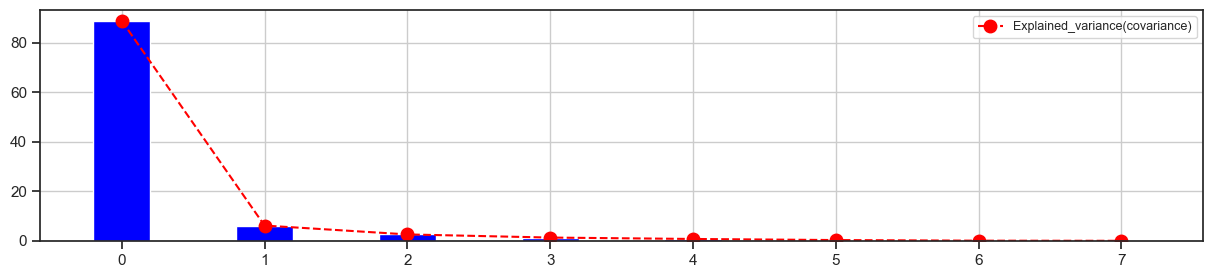

In [27]:
print("\nThis is explained covariance of the each feature (covariance): \n\t{}"
     .format(np.array_str(explained_variance_covariance, precision=2)))
cumulative_covariance = np.cumsum(explained_variance_covariance)
print("\nThis is cumulative covariance (covariance): \n\t{}"
     .format(np.array_str(cumulative_covariance, precision=2)))
fig1 = plt.figure(1, figsize=(15,3))
plt.bar(x=np.arange(np.shape(explained_variance_covariance)[0]), 
       height = explained_variance_covariance, width = 0.4, color='blue')
plt.plot(np.arange(np.shape(explained_variance_covariance)[0]),
                  explained_variance_covariance, linestyle="--", marker='o', markersize=9, color='red', 
                  label='Explained_variance(covariance)')
plt.grid()
plt.legend(fontsize=9)
plt.show()

This is the explained variance (correlation) of the Correlation Matrix R: 
	[26.18 21.64 12.87 10.94  9.53  8.53  5.25  5.06]

 This is the cumulative correlation: 
	[ 26.18  47.82  60.69  71.63  81.16  89.7   94.94 100.  ]


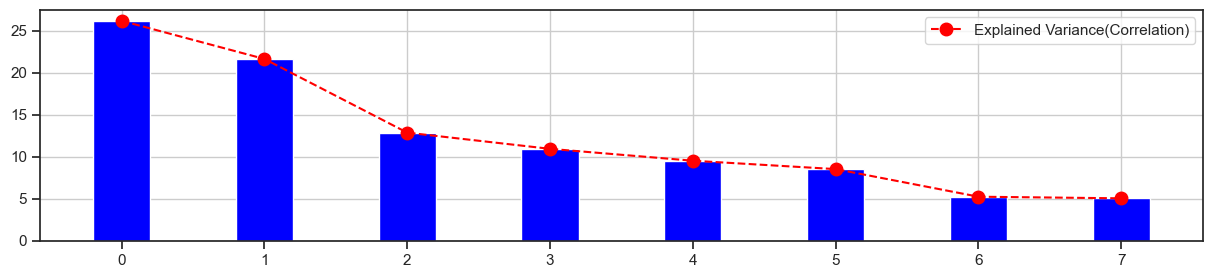

In [28]:
total_variation_correlation = np.sum(eigenvalues_correlation)
explained_variance_correlation =np.asarray([100*(i/total_variation_correlation) for i in sorted(eigenvalues_correlation, reverse = True)])
print("This is the explained variance (correlation) of the Correlation Matrix R: \n\t{}"
     .format(np.array_str(explained_variance_correlation, precision=2)))

cumulative_correlation = np.cumsum(explained_variance_correlation)
print("\n This is the cumulative correlation: \n\t{}".format(np.array_str(cumulative_correlation, precision=2)))

fig2 = plt.figure(1, figsize=(15,3))
plt.bar(x=np.arange(np.shape(explained_variance_correlation)[0]),
       height = explained_variance_correlation, width=0.4, color='blue')
plt.plot(np.arange(np.shape(explained_variance_correlation)[0]),
        explained_variance_correlation, linestyle='--', marker='o', 
         color='red', markersize=9, label="Explained Variance(Correlation)")
plt.grid()
plt.legend()
plt.show()

In [29]:
#Correlation Circle

In [30]:
number_k = 2

In [31]:
CC_Covariance = []
for i in range(np.shape(X)[1]):
    F = []
    for j in range(np.shape(YC)[1]):
        s = (np.corrcoef(X[:,i], YC[:, j])[0])[1]
        F.append(s)
    CC_Covariance.append(F)

In [32]:
CorrelationCircle_covariance = np.asarray(CC_Covariance)

In [33]:
print("This is the Full Correlation Matrix based on C: \n{}"
     .format(CorrelationCircle_covariance))

This is the Full Correlation Matrix based on C: 
[[-6.96021370e-02  2.05284573e-01 -1.31759752e-01 -2.04908787e-01
   4.77640937e-01  1.01404365e-02 -8.15733727e-01 -5.80749134e-04]
 [ 3.54878176e-01  9.28681701e-01  8.86567253e-02  5.27618819e-02
  -2.91979955e-02 -1.07432960e-02 -7.69737652e-05  8.28064386e-06]
 [ 9.64482420e-02  2.23915755e-01 -9.41875363e-01 -1.91096344e-01
  -1.27328746e-01 -2.64540840e-02  1.76994425e-04 -8.63099335e-06]
 [ 4.41814789e-01 -1.10777966e-01 -3.80355389e-01  7.80450734e-01
   1.73001146e-01 -9.39412623e-02  6.57401779e-05  5.12445195e-05]
 [ 9.99646908e-01 -2.50772731e-02  3.59736986e-03 -8.00736489e-03
  -1.58722605e-05  3.60284574e-04 -3.44001100e-05  7.48557976e-07]
 [ 2.06146035e-01  1.81960710e-01 -3.31995666e-01  3.44261404e-01
   2.89140042e-02  8.33558704e-01  9.64786931e-04  1.08757206e-04]
 [ 1.88069506e-01  7.52912062e-02 -3.81736182e-02  1.14680802e-01
   5.25701871e-02  4.14575222e-02  5.33404880e-02 -9.68000323e-01]
 [-3.51625001e-02  3

In [34]:
print("The Correlation Matrix with {} PC's (based on C): \n{}"
     .format(number_k, CorrelationCircle_covariance[:, 0:number_k]))

The Correlation Matrix with 2 PC's (based on C): 
[[-0.06960214  0.20528457]
 [ 0.35487818  0.9286817 ]
 [ 0.09644824  0.22391575]
 [ 0.44181479 -0.11077797]
 [ 0.99964691 -0.02507727]
 [ 0.20614604  0.18196071]
 [ 0.18806951  0.07529121]
 [-0.0351625   0.36401439]]


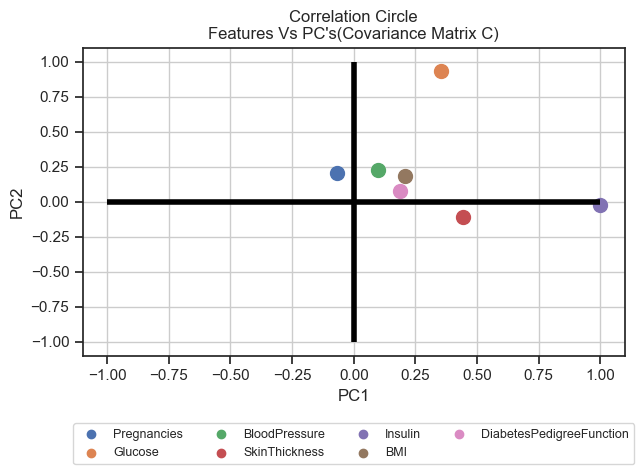

In [35]:
fig3 = plt.figure(figsize=(7,4))
plt.title("Correlation Circle\nFeatures Vs PC's(Covariance Matrix C)")
plt.hlines(y=0, xmin=-1, xmax=1, color='black', linewidth=4, linestyle='solid')
plt.vlines(x=0, ymin=-1, ymax=1, color='black', linewidth=4, linestyle='solid')
for i in range(0, np.shape(X)[1]-1):
    plt.scatter(CorrelationCircle_covariance[i:i+1, 0:1], CorrelationCircle_covariance[i:i+1, 1:2],s=100,
               label=df.columns[i])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.xlim(-1.1, 1.1)
plt.ylim(-1.1, 1.1)
plt.legend(loc='upper center',fancybox=True, bbox_to_anchor = (0.5, -0.2), fontsize=9, ncol=int(np.shape(X)[1]/2),
          markerscale=0.6)
plt.grid()
plt.show()

In [36]:
num_k = 3

In [37]:
CC_Correlation = []
for i in range(0, np.shape(X)[1]-1):
    k = []
    for j in range (0, np.shape(YR)[1]-1):
        d = (np.corrcoef(X[:,i], YR[:,j])[0])[1]
        k.append(d)
    CC_Correlation.append(k)
    
CorrelationCircle_Correlation = np.asarray(CC_Correlation)

In [38]:
print("This is the Correlation Matrix base on R: \n{}"
     .format(CorrelationCircle_Correlation))

This is the Correlation Matrix base on R: 
[[-0.00182987 -0.29798101  0.1551654   0.08349186 -0.04526416 -0.1004683
  -0.04637955]
 [-0.52318863  0.05420668 -0.32829438 -0.12801974  0.24650808 -0.05065215
   0.56190841]
 [-0.26759744 -0.07784141 -0.16969103 -0.05408605  0.40085631 -0.08464236
   0.08701502]
 [-0.52446742  0.5559999  -0.2394909  -0.32782632  0.42234743  0.53476436
   0.38096235]
 [-0.95422969  0.90765522 -0.88222473 -0.96868468  0.92814447  0.90644949
   0.96565775]
 [-0.34347309  0.18554344 -0.16631868 -0.15182369  0.10785492  0.09608588
   0.21417868]
 [-0.2156406   0.16475385 -0.12946405 -0.1506168   0.15807087  0.15042552
   0.19081177]]


In [39]:
print("This is the correlation matrix with {} PC's based on R:{} \n"
     .format(num_k, CorrelationCircle_Correlation[:, 0:num_k]))

This is the correlation matrix with 3 PC's based on R:[[-0.00182987 -0.29798101  0.1551654 ]
 [-0.52318863  0.05420668 -0.32829438]
 [-0.26759744 -0.07784141 -0.16969103]
 [-0.52446742  0.5559999  -0.2394909 ]
 [-0.95422969  0.90765522 -0.88222473]
 [-0.34347309  0.18554344 -0.16631868]
 [-0.2156406   0.16475385 -0.12946405]] 



In [40]:
CorrelationCircle_Correlation

array([[-0.00182987, -0.29798101,  0.1551654 ,  0.08349186, -0.04526416,
        -0.1004683 , -0.04637955],
       [-0.52318863,  0.05420668, -0.32829438, -0.12801974,  0.24650808,
        -0.05065215,  0.56190841],
       [-0.26759744, -0.07784141, -0.16969103, -0.05408605,  0.40085631,
        -0.08464236,  0.08701502],
       [-0.52446742,  0.5559999 , -0.2394909 , -0.32782632,  0.42234743,
         0.53476436,  0.38096235],
       [-0.95422969,  0.90765522, -0.88222473, -0.96868468,  0.92814447,
         0.90644949,  0.96565775],
       [-0.34347309,  0.18554344, -0.16631868, -0.15182369,  0.10785492,
         0.09608588,  0.21417868],
       [-0.2156406 ,  0.16475385, -0.12946405, -0.1506168 ,  0.15807087,
         0.15042552,  0.19081177]])

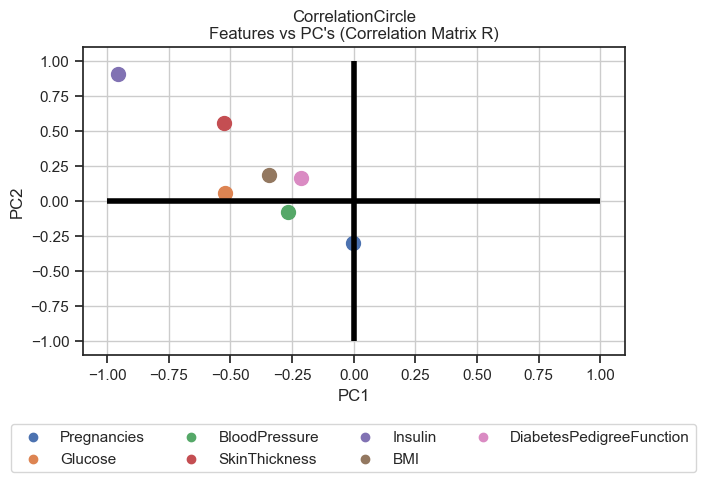

In [41]:
plt.figure(figsize=(7,4))
plt.title("CorrelationCircle\nFeatures vs PC's (Correlation Matrix R)")
plt.hlines(y=0, xmin=-1, xmax=1, linewidth=4, colors='black', linestyle='solid')
plt.vlines(x=0, ymin=-1, ymax=1, linewidth=4, colors='black', linestyle='solid')
for i in range(np.shape(X)[1]-1):
    plt.scatter(CorrelationCircle_Correlation[i:i+1, 0:1],
               CorrelationCircle_Correlation[i:i+1, 1:2], s=100, label=df.columns[i])
plt.legend(loc='upper center', fancybox=True, bbox_to_anchor=(0.5, -0.2),ncol = int(np.shape(X)[1]/2), markerscale=0.6)
plt.grid()
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

In [42]:
# Conclusion
# Covariance Matrix:
# 1. PC1 is an index of the correct pancreatic function. insulin(5)
# 2. PC2 is an index of the correct level of the production of the glucose. glucose(2)

# Correlation Matrix:
# Using the Correlation matrix to perform the PCA and choose k=3 which are the number of components which retain the ~61%
# of the total information embedded in the dataset, it can be shown that all the three PC's are index of insulina and 
# also very low values for the other features. It could be shown in 3D space.